<a href="https://colab.research.google.com/github/Lutambwe186/Image-Classifier/blob/main/Vehicles_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
!pip install -Uqq unpackai
from unpackai.utils import clean_error_img
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 47.8 MB/s 
     |████████████████████████████████| 197 kB 48.4 MB/s 
     |████████████████████████████████| 60 kB 6.5 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 41 kB 399 kB/s 
     |████████████████████████████████| 976 kB 8.9 MB/s 


In [ ]:
!pip install -q jmd_imagescraper
from jmd_imagescraper.imagecleaner import *
from pathlib import Path
from jmd_imagescraper.core import *

In [ ]:

path = Path().cwd()/"images"
number_images_to_download = 150

duckduckgo_search(path, "coupe", "coupe", max_results=number_images_to_download)
duckduckgo_search(path, "suv", "suv", max_results=number_images_to_download)
duckduckgo_search(path, "truck", "pickup truck", max_results=number_images_to_download)

Duckduckgo search: coupe


Duckduckgo search: suv


Duckduckgo search: pickup truck


[Path('/content/images/truck/001_4b8e2221.jpg'),
 Path('/content/images/truck/002_1b04933f.jpg'),
 Path('/content/images/truck/003_2a1da9ce.jpg'),
 Path('/content/images/truck/004_73abe77b.jpg'),
 Path('/content/images/truck/005_a4e33c6d.jpg'),
 Path('/content/images/truck/006_f2d14f93.jpg'),
 Path('/content/images/truck/007_e93549b1.jpg'),
 Path('/content/images/truck/008_5b3bf70b.jpg'),
 Path('/content/images/truck/009_306156b7.jpg'),
 Path('/content/images/truck/010_22fb217a.jpg'),
 Path('/content/images/truck/011_15458ebd.jpg'),
 Path('/content/images/truck/012_8ab9edb9.jpg'),
 Path('/content/images/truck/013_3e27c2ff.jpg'),
 Path('/content/images/truck/014_d8b598b5.jpg'),
 Path('/content/images/truck/015_2839b40e.jpg'),
 Path('/content/images/truck/016_013e9eb7.jpg'),
 Path('/content/images/truck/017_63a74e74.jpg'),
 Path('/content/images/truck/018_9b2845c6.jpg'),
 Path('/content/images/truck/019_f9a55d1d.jpg'),
 Path('/content/images/truck/020_14fc8d3e.jpg'),
 Path('/content/imag

In [ ]:
path.ls()
display_image_cleaner(path)


HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [ ]:
clean_error_img(path)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

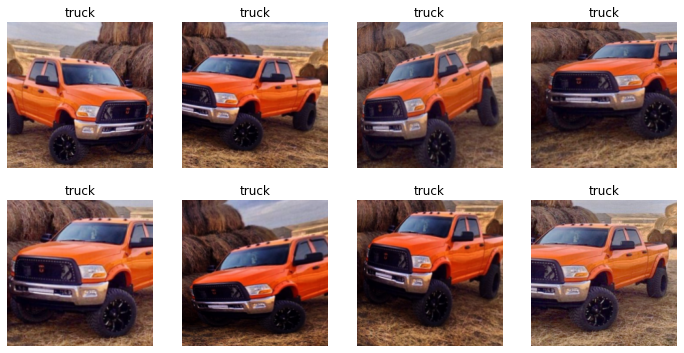

In [ ]:
vehicles = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = vehicles.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.956707,0.838946,0.640449,01:16


epoch,train_loss,valid_loss,accuracy,time
0,1.020903,0.656704,0.707865,01:44
1,0.895169,0.533343,0.764045,01:43
2,0.832672,0.522736,0.786517,01:38


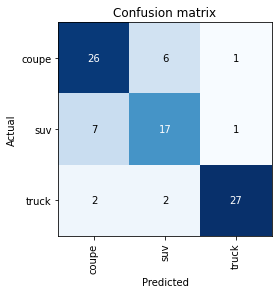

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

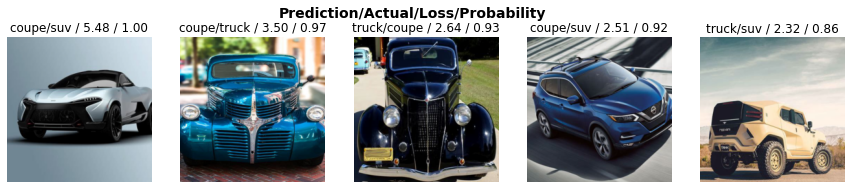

In [ ]:
interp.plot_top_losses(5, nrows=1)


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner


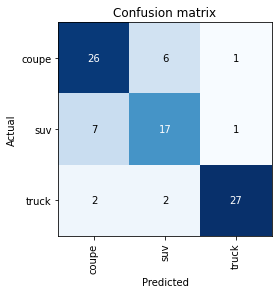

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

#@title Build the functionality of our Notebook App
uploader = widgets.FileUpload()
output = widgets.Output()
classify = widgets.Button(description='Classify')
prediction = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(uploader.data[-1])
    output.clear_output()
    with output: 
      display(img.to_thumb(254,254))
    pred, pred_idx, probs = learn.predict(img)
    prediction.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

classify.on_click(on_click_classify)

VBox([widgets.Label('Select your image!'), 
      uploader, classify, output, prediction])